# **Ass1** *Use the idea of solving the TSP problem to design a route for the famous attractions in Chengdu city*

## Step1 prepare Google drive, and load data

In [1]:
# Load Google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
cd /content/gdrive/My Drive/AI-ass1

/content/gdrive/My Drive/AI-ass1


In [3]:
# Load data
import pandas as pd

# Showing the first five rows of data proves that we have successfully loaded a good
df = pd.read_csv('CDC-Attractions.csv')
df.head()

,Place,longitude,latitude,locationX,locationY
0,Chengdu Museum,30.665,104.044,665,44
1,Du Fu Thatched Cottage,30.660,104.026,660,26
2,Jinsha Site Museum Tourist Center,30.680,104.012,680,12
3,Jinli Old Street,30.645,104.049,645,49
4,Qingyang Palace,30.660,104.041,660,41


# Step 2 Find location coordinates by place name

In [4]:
# creating a dictionary
locations = {}

# The key x1 comes from df["Place"], which represents the name of a place.
# The value x2 is a tuple (locationX, locationY) formed from df["locationX"] and df["locationY"].
for x1,x2 in zip(df["Place"],zip(df["locationX"],df["locationY"])):
    locations[x1] = x2

locations

{'Chengdu Museum': (665, 44),
 'Du Fu Thatched Cottage': (660, 26),
 'Jinsha Site Museum Tourist Center': (680, 12),
 'Jinli Old Street': (645, 49),
 'Qingyang Palace ': (660, 41),
 'People’s Park': (657, 58),
 'Kuan Alley and Zhai Alley': (663, 54),
 'Chengdu Research Base of Giant Panda Breeding': (733, 152),
 'Chengdu East Gate Chengqiang Relic Site': (647, 73),
 'Chengdu East Railway Station': (630, 139),
 'Chengdu Shuangliu International Airport': (571, 970),
 'Happy Valley Chengdu': (724, 22),
 'Wenshu Yuan Monastery': (676, 74),
 'Tianfu Square': (657, 66),
 'IFS International Finance Center': (655, 81),
 'Sichuan University Wangjiang Campus': (631, 83),
 'Global Center': (569, 63),
 'Jincheng Lake': (570, 40),
 'Fenghunagshan Football Stadium': (738, 81)}

# Step 3 Calculate and print the Euclidean distance between a set of locations



The main task of the define_map function is to generate a list of cities and the distances between them.

In [5]:
import numpy as np

def define_map(city_location):
    global distances
    city_locations = city_location # Assigns the incoming dictionary of cities and coordinates to city_locations
    all_cities = [] # Store the name of the city
    distances = {} # Store the distance between each pair of cities

    for city in city_locations.keys():
        distances[city] = {} # Create a dictionary called distances[city] to subsequently store distances between city and other cities
        all_cities.append(city) # Add each city name to all_cities
    all_cities.sort() # Alphabetical sorting of all_cities to keep them in order for subsequent processing

    # Calculate the Euclidean distance between two cities using np.linalg.norm
    for name_1, coordinates_1 in city_locations.items():
            for name_2, coordinates_2 in city_locations.items():
                distances[name_1][name_2] = np.linalg.norm([coordinates_1[0] - coordinates_2[0], coordinates_1[1] - coordinates_2[1]])
                distances[name_2][name_1] = distances[name_1][name_2]

    # all_cities: list of names of all cities. distances: Euclidean distance between every two cities.
    return (all_cities, distances)

all_cities, distances = define_map(locations)

# Print out the distance between locations
for place1 in distances:
    for place2 in distances[place1]:
        print(f"Distance from {place1} to {place2} is {distances[place1][place2]:.2f}")

Distance from Chengdu Museum to Chengdu Museum is 0.00
Distance from Chengdu Museum to Du Fu Thatched Cottage is 18.68
Distance from Chengdu Museum to Jinsha Site Museum Tourist Center is 35.34
Distance from Chengdu Museum to Jinli Old Street is 20.62
Distance from Chengdu Museum to Qingyang Palace  is 5.83
Distance from Chengdu Museum to People’s Park is 16.12
Distance from Chengdu Museum to Kuan Alley and Zhai Alley is 10.20
Distance from Chengdu Museum to Chengdu Research Base of Giant Panda Breeding is 127.62
Distance from Chengdu Museum to Chengdu East Gate Chengqiang Relic Site is 34.13
Distance from Chengdu Museum to Chengdu East Railway Station is 101.24
Distance from Chengdu Museum to Chengdu Shuangliu International Airport is 930.76
Distance from Chengdu Museum to Happy Valley Chengdu is 62.97
Distance from Chengdu Museum to Wenshu Yuan Monastery is 31.95
Distance from Chengdu Museum to Tianfu Square is 23.41
Distance from Chengdu Museum to IFS International Finance Center is

# Step 4 Operating 3 different algorithm

The function generate_k_neighbouring_paths aims to generate k neighbouring paths from a given path.

In [6]:
import random

def generate_k_neighbouring_paths(path, k=2):
    current_path = path[:] # Save original path content
    neighbouring_path = path[:] # It is modified in each iteration to generate new neighbourhood paths
    neighbouring_paths = [] # Storing generated neighbourhood paths

    # Generate k neighbourhood paths by loop
    for i in range(k):

        # Random selection from the first to the penultimate element of the path avoids changing the start or end of the path.
        left = random.randint(1, len(current_path) - 1)
        right = random.randint(1, len(current_path) - 1)

        # Ensure that left is smaller than right to facilitate the use of slicing when paths are inverted.
        if left > right:
            left, right = right, left

        # Extracts a sub-list from neighbouring_path with indexes left to right
        neighbouring_path[left: right + 1] = reversed(neighbouring_path[left: right + 1])

        # Add the modified neighbouring_path to the neighbouring_paths list
        neighbouring_paths.append(neighbouring_path)

        # To ensure that each iteration starts with the original path, reassign neighbouring_path to a copy of the original path, path[:], in preparation for the next neighbouring path generation
        neighbouring_path = path[:]

    return neighbouring_paths

The cost_fun function is used to calculate the total distance of the entire trip from the starting city, through all other cities, and back to the starting city

In [7]:
def cost_fun(path):
    # Initialize total distance to 0
    total_distance = 0

    # Calculate the distance for each pair of consecutive cities in the path
    for i in range(len(path) - 1):
        city1 = path[i]
        city2 = path[i + 1]
        # Accumulate the total distance by finding the distance between city1 and city2 from distances and adding that distance to total_distance
        total_distance += distances[city1][city2]

    # Add the distance from the last city back to the first city
    start_city = path[0]
    final_city = path[-1]
    # Calculate the distance from the last city back to the starting city.
    total_distance += distances[start_city][final_city]

    return total_distance

In [8]:
# The starting point of the route is set to be Chengdu Museum.
start_city = 'Chengdu Museum'

The shuffled(city_list) function gets a randomly shuffled list of cities as an initial path for the algorithm

In [9]:
def shuffled(iterable):
    """Randomly shuffle a copy of iterable."""
    items = list(iterable)
    # Randomised disruption of the list
    random.shuffle(items)
    return items

The argmin_random_tie function finds the element from a sequence of seqs that has the smallest value based on a given key.

In [10]:
# cost_fun作为key的参数，通过传递 cost_fun，可以找到距离最小的路径
def argmin_random_tie(seq, key):
    """Return a minimum element of seq; break ties at random."""
    return min(shuffled(seq), key=key)

**Part 1 Hill Climbing Algorithm**



In [11]:
def Hill_climbing(city_list, neighbour_function, cost_fun, times=500, iteration = 1000, start_point = None):
    current = city_list
    iterations = iteration # Cycle 1000 times
    count = 0 # Record the number of consecutive iterations without

    # Reduce iterations by one per cycle until it reaches zero.
    while iterations:
        # Call neighbour_function(current) to generate a list of neighbours for the current path, current.
        neighbours = neighbour_function(current)
        if not neighbours:
            break
        # Selection of neighbouring paths with minimum cost
        neighbour = argmin_random_tie(neighbours, key=lambda node: cost_fun(node))
        # If count reaches times, the loop breaks if several iterations have failed to improve the solution.
        if count >= times:
            break
        # If count reaches times, indicating that several consecutive iterations have failed to improve the solution,
        # the loop is interrupted If the cost of the neighbouring solution neighbour is found to be less than the cost
        # of the current solution current is updated to neighbour and count is reset to 0
        if cost_fun(neighbour) < cost_fun(current):
            current = neighbour
            count = 0
        # If neighbour's cost is not less than the current solution, count is increased by 1
        else:
            count += 1
        iterations -= 1
    # If start_point is specified, a start point is added to the final path to form a closed loop path.
    if start_point != None:
        current.append(start_point)

    return (current,cost_fun(current))

The define_init function generates a new list of cities based on the given list of cities, city_list, and the specified start city, start_point, and ensures that start_point is used as the starting point of the path.

In [12]:
# city_list indicates all cities in the trip
# start_point indicates the city from which the trip starts
def define_init(city_list, start_point):
    init_citylist = city_list[:]
    init_citylist.remove(start_point)
    init_citylist.insert(0, start_point)
    return init_citylist

init stores a list of cities starting from start_city, making sure the path starts at start_city.

In [13]:
init = define_init(all_cities , start_city)

max_iterations denotes the maximum number of iterations of the algorithm

n_times is used to control the number of repetitions of an experiment or algorithm run

In [14]:
max_iterations = 1000
n_times = 50

In [15]:
# Call Hill_climbing function
solution, cost =  Hill_climbing(init, generate_k_neighbouring_paths, cost_fun, n_times, max_iterations, start_city)

In [16]:
# print final route and total cost
print("Final route:", solution)
print("Total cost:", cost)

Final route: ['Chengdu Museum', 'Qingyang Palace ', 'Du Fu Thatched Cottage', 'Jinsha Site Museum Tourist Center', 'Happy Valley Chengdu', 'Fenghunagshan Football Stadium', 'Wenshu Yuan Monastery', 'Tianfu Square', 'IFS International Finance Center', 'Chengdu East Gate Chengqiang Relic Site', 'Sichuan University Wangjiang Campus', 'Chengdu East Railway Station', 'Chengdu Research Base of Giant Panda Breeding', 'Chengdu Shuangliu International Airport', 'Global Center', 'Jincheng Lake', 'Jinli Old Street', 'People’s Park', 'Kuan Alley and Zhai Alley', 'Chengdu Museum']
Total cost: 2311.01274910322


In [17]:
# print initial route and total cost
init_representation = init
print("Initial route:", init_representation)
print("Total cost:", cost_fun(init))

Initial route: ['Chengdu Museum', 'Chengdu East Gate Chengqiang Relic Site', 'Chengdu East Railway Station', 'Chengdu Research Base of Giant Panda Breeding', 'Chengdu Shuangliu International Airport', 'Du Fu Thatched Cottage', 'Fenghunagshan Football Stadium', 'Global Center', 'Happy Valley Chengdu', 'IFS International Finance Center', 'Jincheng Lake', 'Jinli Old Street', 'Jinsha Site Museum Tourist Center', 'Kuan Alley and Zhai Alley', 'People’s Park', 'Qingyang Palace ', 'Sichuan University Wangjiang Campus', 'Tianfu Square', 'Wenshu Yuan Monastery']
Total cost: 2929.9873456357222


Plot the change in path cost of the hill-climbing algorithm in each iteration, reflecting the optimisation of the algorithm

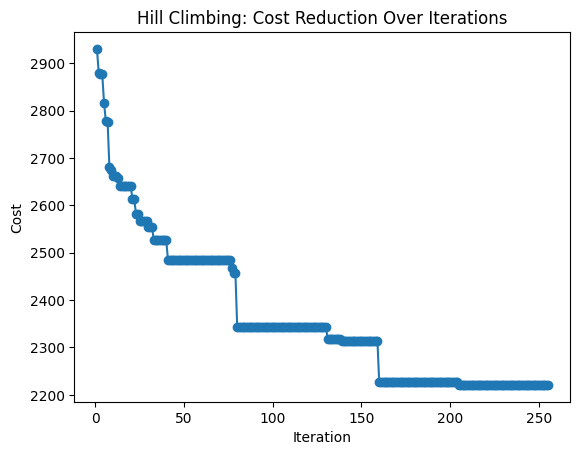

In [18]:
import matplotlib.pyplot as plt

def Hill_climbing_with_logging(city_list, neighbour_function, cost_fun, times=500, iteration=1000, start_point=None):
    current = city_list
    costs_history = []  # Used to record the cost of each iteration
    iterations = iteration  # Maximum number of iterations
    count = 0  # Continuous unimproved counters
    
    # codes below were cited from Chargpt 4o
    while iterations > 0 and count < times:
        neighbours = neighbour_function(current)
        # If there are no neighbouring solutions, exit the loop
        if not neighbours:
            break

        # Find the least costly neighbourhood solution
        neighbour = min(neighbours, key=cost_fun)

        if cost_fun(neighbour) < cost_fun(current):
            current = neighbour
            count = 0  # Reset unimproved count
        else:
            count += 1  # Increase in unimproved count

        costs_history.append(cost_fun(current))  # Record the cost of the current path
        iterations -= 1  # Reduced number of remaining iterations

    # Ensure that pathways form closed loops
    if start_point is not None and current[-1] != start_point:
        current.append(start_point)

    return current, cost_fun(current), costs_history

# codes below were cited from Chargpt 4o
# Run hill-climbing algorithm and record cost history
solution, final_cost, costs_history = Hill_climbing_with_logging(init, generate_k_neighbouring_paths, cost_fun, n_times, max_iterations, start_city)

# Generate a list of iterations
iterations = list(range(1, len(costs_history) + 1))

# Plot line graphs to show the effect of optimisation
plt.plot(iterations, costs_history, marker='o')

# Add titles and tags
plt.title('Hill Climbing: Cost Reduction Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Cost')

# Show charts
plt.show()

**part 2 Simulated Annealing Algorithm**

In [19]:
import numpy as np
import sys
import random

# Decide whether to accept a sub-optimal solution or not, accepting a worse solution by probability helps to avoid the algorithm falling into a local optimum
def probability(p):
    """Return true with probability p."""
    return p > random.uniform(0.0, 1.0)

def simulated_annealing(init, energy, neighbor, schedule, start_point = None):
    current = init
    cost_history = []  # Used to record the cost of each iteration

    for t in range(sys.maxsize):
        T = schedule()(t)

        # When the temperature T drops to 0, the algorithm stops optimising and exits the loop
        if T == 0:
            break
        neighbors = neighbor(current)
        # If there are no neighbouring solutions, it means that the current solution cannot be further optimised or adapted and the algorithm simply exits the loop
        if not neighbors:
            break
        # Select a random solution from the set of neighbouring solutions.
        # The randomness of this step helps to increase the exploratory nature of the algorithm and avoids prematurely falling into a local optimum
        next_choice = random.choice(neighbors)
        delta_e =  energy(next_choice) - energy(current)
        # If the energy of the new solution is lower than the current solution, then accept the new solution.
        # If the energy of the new solution is higher than the current solution (i.e. delta_e > 0), decide whether to accept the new solution or not by a probability
        if delta_e < 0 or probability(np.exp(- delta_e / T)):
            current = next_choice

        # Record the cost of the current path
        cost_history.append(energy(current))

    if start_point != None:
        current.append(start_point)

    return (current,energy(current),cost_history)

In [20]:
# Ensure that the starting city is at the beginning of the list
def define_init(city_list, start_point):
    init_citylist = city_list[:]
    # Delete the specified start_point to ensure that the city is not repeated in the list
    init_citylist.remove(start_point)
    init_citylist.insert(0, start_point)
    return init_citylist

In [21]:
init = define_init(all_cities, start_city)

Initially the temperature is higher and the algorithm is more likely to accept suboptimal solutions, thus avoiding falling into local optima. As the number of iterations increases and the temperature gradually decreases, the algorithm is more inclined to choose the optimal solution until it finally converges.

In [22]:
# Controls the temperature during the annealing process
# k=20: initial value of temperature (or maximum temperature).
# lam=0.005: temperature decay rate (lambda indicates how fast the temperature decays in each iteration).
# limit=10000: maximum number of iterations. After this number, the temperature is set to 0, indicating that the algorithm stops cooling.
def exp_schedule(k=20, lam=0.005, limit=10000):
    return lambda t: (k * np.exp(-lam * t) if t < limit else 0)

In [23]:
# Calculate the total cost of a given path
def energy(state):
    cost = 0
    for i in range(len(state) - 1):
        cost += distances[state[i]][state[i + 1]]
    # The traveller must return from the last city to the starting point
    cost += distances[state[0]][state[-1]]
    return cost

In [26]:
# call simulated_annealing algorithm
solution, cost, cost_history = simulated_annealing(init, energy, generate_k_neighbouring_paths, exp_schedule, start_city)

In [28]:
print("Final route:", solution)
print("Final cost:", cost)

Final route: ['Chengdu Museum', 'Kuan Alley and Zhai Alley', 'Jinli Old Street', 'People’s Park', 'Tianfu Square', 'Wenshu Yuan Monastery', 'IFS International Finance Center', 'Chengdu East Gate Chengqiang Relic Site', 'Sichuan University Wangjiang Campus', 'Jincheng Lake', 'Global Center', 'Chengdu East Railway Station', 'Chengdu Shuangliu International Airport', 'Chengdu Research Base of Giant Panda Breeding', 'Fenghunagshan Football Stadium', 'Happy Valley Chengdu', 'Jinsha Site Museum Tourist Center', 'Du Fu Thatched Cottage', 'Qingyang Palace ', 'Chengdu Museum']
Final cost: 2209.0787816650527


In [29]:
init_representation = init
print("Initial route:", init_representation)
print("Initial cost:", cost_fun(init))

Initial route: ['Chengdu Museum', 'Chengdu East Gate Chengqiang Relic Site', 'Chengdu East Railway Station', 'Chengdu Research Base of Giant Panda Breeding', 'Chengdu Shuangliu International Airport', 'Du Fu Thatched Cottage', 'Fenghunagshan Football Stadium', 'Global Center', 'Happy Valley Chengdu', 'IFS International Finance Center', 'Jincheng Lake', 'Jinli Old Street', 'Jinsha Site Museum Tourist Center', 'Kuan Alley and Zhai Alley', 'People’s Park', 'Qingyang Palace ', 'Sichuan University Wangjiang Campus', 'Tianfu Square', 'Wenshu Yuan Monastery']
Initial cost: 2929.9873456357222


Plot the change in path cost of the simulated annealing algorithm in each iteration, reflecting the optimisation of the algorithm

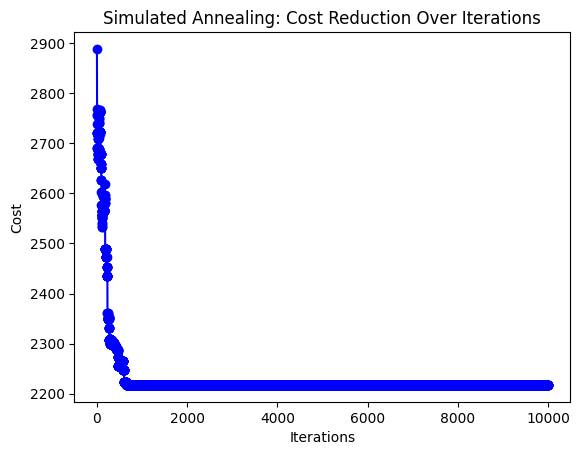

In [30]:
import matplotlib.pyplot as plt

# codes below were cited from Chargpt 4o
# Call the simulated_annealing algorithm
solution, final_cost, cost_history = simulated_annealing(init, energy, generate_k_neighbouring_paths, exp_schedule, start_city)

# Use matplotlib to plot the cost reduction process
iterations = list(range(len(cost_history)))
plt.plot(iterations, cost_history, marker='o', linestyle='-', color='b')

# Add titles and tags
plt.title('Simulated Annealing: Cost Reduction Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')

# Show charts
plt.show()